Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Loading the dataset

In [2]:
from google.colab import files
uploded = files.upload()

Saving breast-cancer-wisconsin.csv to breast-cancer-wisconsin.csv


Reading the dataset

In [3]:
import io
data = pd.read_csv(io.BytesIO(uploded['breast-cancer-wisconsin.csv']))

Exploring the dataset

In [4]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [5]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,1.020000e+02,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,1.101964e+06,4.774510,3.245098,3.401961,2.617647,3.715686,3.519608,3.784314,3.323529,1.941176,2.921569
std,4.501774e+04,3.011223,2.857806,2.829336,2.606329,2.637796,3.352937,1.968200,3.221714,2.210791,1.001843
min,1.002945e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,1.067095e+06,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.110514e+06,4.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.135390e+06,7.000000,5.000000,5.000000,3.000000,5.000000,5.750000,5.000000,5.000000,1.000000,4.000000
max,1.168736e+06,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,4.000000


<Axes: >

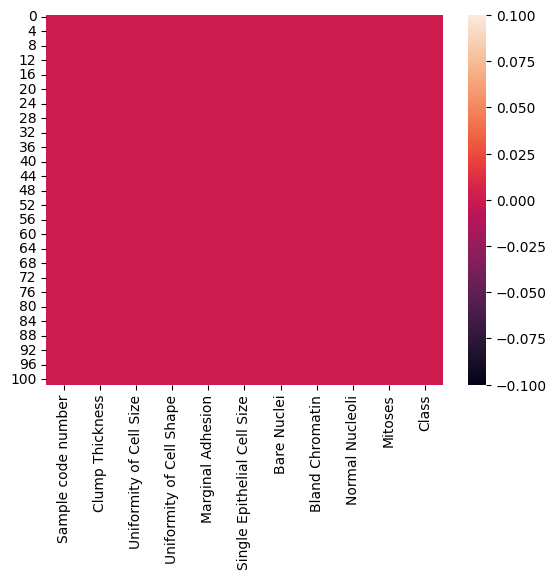

In [6]:
sns.heatmap(data.isna())

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           102 non-null    int64
 1   Clump Thickness              102 non-null    int64
 2   Uniformity of Cell Size      102 non-null    int64
 3   Uniformity of Cell Shape     102 non-null    int64
 4   Marginal Adhesion            102 non-null    int64
 5   Single Epithelial Cell Size  102 non-null    int64
 6   Bare Nuclei                  102 non-null    int64
 7   Bland Chromatin              102 non-null    int64
 8   Normal Nucleoli              102 non-null    int64
 9   Mitoses                      102 non-null    int64
 10  Class                        102 non-null    int64
dtypes: int64(11)
memory usage: 8.9 KB


Data Visualization

<Axes: xlabel='Class', ylabel='count'>

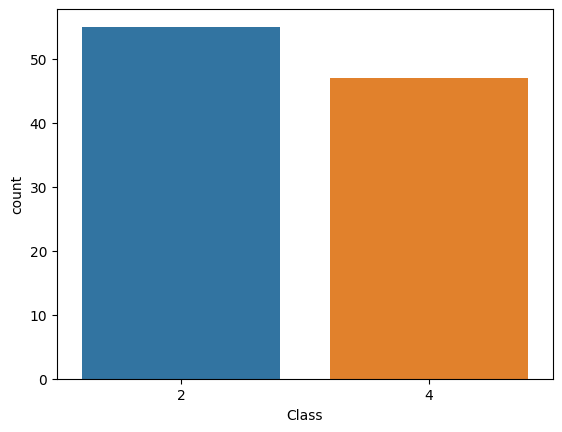

In [8]:
sns.countplot(x='Class',data=data)

Initializing variables of x and y

In [11]:
x = data[['Clump Thickness','Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei','Bland Chromatin','Normal Nucleoli', 'Mitoses']]
y = data['Class']

Printing values of x and y

In [12]:
x

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,4,4,5,7,10,3,2,1
1,3,1,1,1,2,2,3,1,1
2,6,8,8,1,3,4,3,7,1
3,4,1,1,3,2,1,3,1,1
4,8,10,10,8,7,10,9,7,1
...,...,...,...,...,...,...,...,...,...
97,10,3,5,1,10,5,3,10,2
98,2,3,4,4,2,5,2,5,1
99,4,1,2,1,2,1,3,1,1
100,8,2,3,1,6,3,7,1,1


In [13]:
y

0      2
1      2
2      2
3      2
4      4
      ..
97     4
98     4
99     2
100    4
101    4
Name: Class, Length: 102, dtype: int64

Building logistic regression model with
sklearn

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr = LogisticRegression()

Training the model

In [18]:
lr.fit(x_train, y_train)

LogisticRegression()

Testing the model and calculating confusion matrix

In [19]:
predict = lr.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_test,predict)

array([[18,  1],
       [ 1, 14]])

In [22]:
pd.DataFrame(confusion_matrix(y_test,predict), columns=['predicted_no','predicted_yes'], index=['actual_no','actual_yes'])

,predicted_no,predicted_yes
actual_no,18,1
actual_yes,1,14


In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           2       0.95      0.95      0.95        19
           4       0.93      0.93      0.93        15

    accuracy                           0.94        34
   macro avg       0.94      0.94      0.94        34
weighted avg       0.94      0.94      0.94        34



importing pickle module for flask

In [25]:
import pickle

In [26]:
filename = 'cancer_pred'
pickle.dump(lr, open(filename,'wb'))

In [27]:
filename = 'cancer_pred'
loaded_model = pickle.load(open(filename,'rb'))

In [28]:
pred_result = loaded_model.predict([[7,3,2,10,5,10,5,4,4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [29]:
print(pred_result)

[4]
